In [87]:
%matplotlib inline
#%matplotlib widget


In [88]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import matplotlib.colors as colors
from ipywidgets import HBox, Textarea, interact

In [89]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames

In [90]:
tts = np.arange(10)
z = pd.DataFrame({'t':tts,'x':[0]*len(tts)})
xy = pd.DataFrame({'t':[0,1,4,7,9],'x':[1,1,1,1,1]},index=[0,1,4,7,9])
print(xy)
test=pd.Series(np.ones(len(tts)))
#cond = ~z['t'].isin(xy.t)
z['x']=xy.x
z.loc[cond,'x'] = test

z

   t  x
0  0  1
1  1  1
4  4  1
7  7  1
9  9  1


,t,x
0,0,1.0
1,1,1.0
2,2,NaN
3,3,NaN
4,4,1.0
5,5,1.0
6,6,NaN
7,7,1.0
8,8,NaN
9,9,1.0


In [91]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack_botnum_28cm.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
suffix='_distances.csv'
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
close_threshold=140**2
too_close_thresh=100**2
countdf=pd.DataFrame()
#bot_nums=pd.DataFrame()
bottypes=['fronter','aligner']
for bottype in bottypes:
    relevant_table=expSumPassive[(expSumPassive['bottype']==bottype)]
    bot_num_array=pd.Series([]);
    bot_num_before=0
    bot_iteration=0
    for index,row in relevant_table.iterrows():
        FileName=row.locatingFileNamePack
        bot_num_current=row.bots
        if bot_num_current==bot_num_before:
            
            bot_iteration=bot_iteration+1
        else:
            bot_iteration=0
        #bot_num_array[index]=row.bots
        print(FileName)
        srtarting_frame=read_time(row.start_min)
        data=pd.read_csv(passive_path+'\\'+FileName+suffix,index_col=0)
        cond = (data.distance_sq<=close_threshold)&(data.distance_sq>too_close_thresh)
        dataCond = data[cond]
        #data['hascond']=np.where(cond,True,False)
        dataCG=dataCond.groupby(['frame'], as_index=True).count()
        dataCG.to_csv(passive_path+'\\dataCG_test.csv')
        data_count=pd.DataFrame(data={'frame': list(range(0,int(data.frame.iloc[-1])))})
        data_count['kissing_count']=dataCG.distance_sq
        data_count['kissing_count'] =data_count['kissing_count'].fillna(0)
        data_count_relevant=data_count.iloc[srtarting_frame:len(data_count)].reset_index()

        data_count_relevant['iteration']=np.ones(len(data_count_relevant))*bot_iteration
        data_count_relevant['bot_num']=np.ones(len(data_count_relevant))*bot_num_current
        bottype_array=[bottype]*len(data_count_relevant)
        data_count_relevant['bot_type']=bottype_array
        countdf=pd.concat([countdf,data_count_relevant],axis=0)
        bot_num_before=bot_num_current
    #bot_nums=pd.concat([bot_nums,bot_num_array.rename(bottype)],axis=1)
#countdf.fillna(0,inplace=True)
countdf.to_csv(passive_path+'\\countdf_test.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_21388\214231008.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bot_num_array=pd.Series([]);


fronter_N001_D028_C0556.MP4_loc.csv
fronter_N001_D028_C0555.MP4_loc.csv
fronter_N001_D028_C0554.MP4_loc.csv
fronter_N001_D028_C0553.MP4_loc.csv
fronter_N004_D028_C0560.MP4_loc.csv
fronter_N004_D028_C0559.MP4_loc.csv
fronter_N004_D028_C0558.MP4_loc.csv
fronter_N004_D028_C0557.MP4_loc.csv
fronter_N008_D028_C0567.MP4_loc.csv
fronter_N008_D028_C0566.MP4_loc.csv
fronter_N008_D028_C0565.MP4_loc.csv
fronter_N008_D028_C0563.MP4_loc.csv
fronter_N008_D028_C0562.MP4_loc.csv
fronter_N016_D028_C0571.MP4_loc.csv
fronter_N016_D028_C0570.MP4_loc.csv
fronter_N016_D028_C0569.MP4_loc.csv
fronter_N016_D028_C0568.MP4_loc.csv
fronter_N053_D028_C0505.MP4_loc.csv
fronter_N053_D028_C0506.MP4_loc.csv
fronter_N053_D028_C0507.MP4_loc.csv
fronter_N053_D028_C0509.MP4_loc.csv
fronter_N021_D028_C0490.MP4_loc.csv
fronter_N021_D028_C0491.MP4_loc.csv
fronter_N021_D028_C0492.MP4_loc.csv
fronter_N021_D028_C0493.MP4_loc.csv


C:\Users\User\AppData\Local\Temp\ipykernel_21388\214231008.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  bot_num_array=pd.Series([]);


aligner_N001_D028_C0575.MP4_loc.csv
aligner_N001_D028_C0574.MP4_loc.csv
aligner_N001_D028_C0573.MP4_loc.csv
aligner_N001_D028_C0572.MP4_loc.csv
aligner_N004_D028_C0580.MP4_loc.csv
aligner_N004_D028_C0579.MP4_loc.csv
aligner_N004_D028_C0578.MP4_loc.csv
aligner_N004_D028_C0577.MP4_loc.csv
aligner_N004_D028_C0576.MP4_loc.csv
aligner_N008_D028_C0587.MP4_loc.csv
aligner_N008_D028_C0586.MP4_loc.csv
aligner_N008_D028_C0585.MP4_loc.csv
aligner_N008_D028_C0584.MP4_loc.csv
aligner_N008_D028_C0583.MP4_loc.csv
aligner_N008_D028_C0581.MP4_loc.csv
aligner_N016_D028_C0591.MP4_loc.csv
aligner_N016_D028_C0590.MP4_loc.csv
aligner_N016_D028_C0589.MP4_loc.csv
aligner_N016_D028_C0588.MP4_loc.csv
aligner_N053_D028_C0510.MP4_loc.csv
aligner_N053_D028_C0511.MP4_loc.csv
aligner_N053_D028_C0512.MP4_loc.csv
aligner_N053_D028_C0513.MP4_loc.csv
aligner_N021_D028_C0494.MP4_loc.csv
aligner_N021_D028_C0495.MP4_loc.csv
aligner_N021_D028_C0497.MP4_loc.csv
aligner_N021_D028_C0498.MP4_loc.csv


In [92]:
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
fronters_count=countdf[(countdf['bot_type']=='fronter')].reset_index()
fronters_count.to_csv(passive_path+'\\fronters_count.csv')
aligners_count=countdf[(countdf['bot_type']=='aligner')].reset_index()
aligners_count.to_csv(passive_path+'\\aligners_count.csv')


In [93]:
fronter_mean=fronters_count.groupby(by=['bot_num','level_0']).mean()
print(fronter_mean)

                    index     frame  kissing_count  iteration
bot_num level_0                                              
1.0     0          281.25    281.25            1.0        1.5
        1          282.25    282.25            1.0        1.5
        2          283.25    283.25            1.0        1.5
        3          284.25    284.25            1.0        1.5
        4          285.25    285.25            1.0        1.5
...                   ...       ...            ...        ...
53.0    22682    23432.00  23432.00            4.5        2.5
        22683    23433.00  23433.00            4.5        2.5
        22684    23434.00  23434.00            4.0        2.5
        22685    23410.00  23410.00            3.0        3.0
        22686    23411.00  23411.00            3.0        3.0

[197878 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_21388\1051926895.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(by=['bot_num','level_0']).mean()


In [94]:
aligners_mean=aligners_count.groupby(by=["bot_num","level_0"]).mean()
print(aligners_mean)

                   index    frame  kissing_count  iteration
bot_num level_0                                            
1.0     0          250.0    250.0            1.0        1.5
        1          251.0    251.0            1.0        1.5
        2          252.0    252.0            1.0        1.5
        3          253.0    253.0            1.0        1.5
        4          254.0    254.0            1.0        1.5
...                  ...      ...            ...        ...
53.0    29716    30391.0  30391.0            1.0        3.0
        29717    30392.0  30392.0            1.0        3.0
        29718    30393.0  30393.0            1.0        3.0
        29719    30394.0  30394.0            1.0        3.0
        29720    30395.0  30395.0            1.0        3.0

[204106 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_21388\626531495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aligners_mean=aligners_count.groupby(by=["bot_num","level_0"]).mean()


In [95]:
fronter_mean=fronters_count.groupby(['bot_num','level_0']).mean()
fronter_std=fronters_count.groupby(['bot_num','level_0']).std()

aligners_mean=aligners_count.groupby(['bot_num','level_0']).mean()
aligners_std=aligners_count.groupby(['bot_num','level_0']).std()

C:\Users\User\AppData\Local\Temp\ipykernel_21388\1236069990.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(['bot_num','level_0']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_21388\1236069990.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_std=fronters_count.groupby(['bot_num','level_0']).std()
C:\Users\User\AppData\Local\Temp\ipykernel_21388\1236069990.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only column

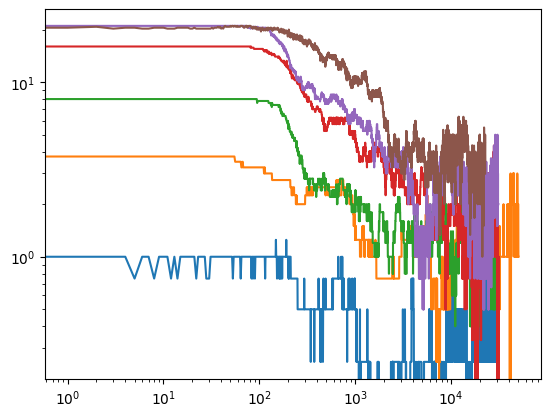

In [96]:
for i in [1,4,8,16,21,53]:
    current_data=fronter_mean.loc[i]
    #print(current_data)
    plt.loglog(current_data['kissing_count'])
#test=pd.DataFrame(fronter_mean.loc[1])


In [39]:
aligners_mean

distance_sq  iteration
bot_num frame                          
1.0     150.0            1.0        1.0
        151.0            1.0        1.0
        152.0            1.0        1.0
        153.0            1.0        1.0
        154.0            1.0        1.0
...                      ...        ...
53.0    30392.0          1.0        3.0
        30393.0          1.0        3.0
        30394.0          1.0        3.0
        30395.0          1.0        3.0
        30396.0          1.0        3.0

[135827 rows x 2 columns]

In [62]:
current_data_aligners.index

Float64Index([  625.0,   626.0,   627.0,   628.0,   629.0,   630.0,   631.0,
                632.0,   633.0,   634.0,
              ...
              30387.0, 30388.0, 30389.0, 30390.0, 30391.0, 30392.0, 30393.0,
              30394.0, 30395.0, 30396.0],
             dtype='float64', name='frame', length=29772)

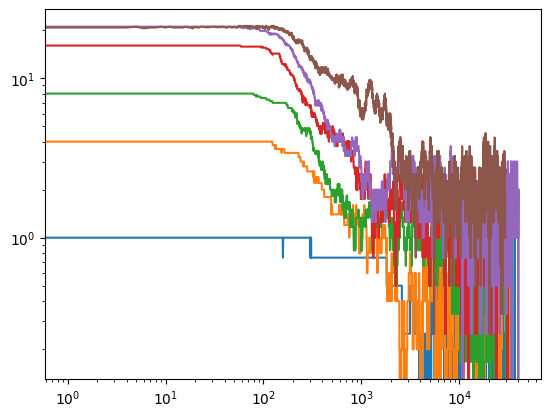

In [97]:
for j in [1,4,8,16,21,53]:
    current_data_aligners=aligners_mean.loc[j]
    #print(current_data)
    plt.loglog(current_data_aligners['kissing_count'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

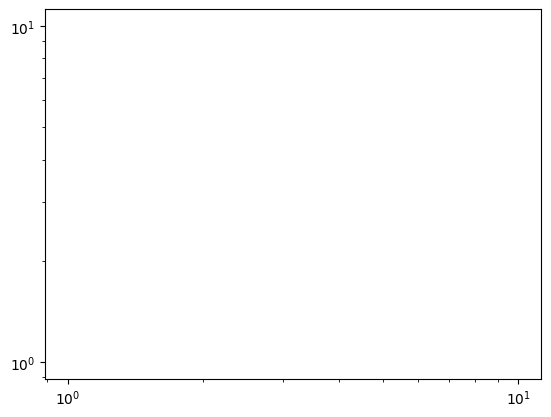

In [47]:
#plt.loglog(fronter_mean,color='olive')
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
lines = fronter_mean.group.unique()
for i in lines:
  ax.errorbar(x=list(range(0,len(fronter_mean.iloc[:,i]))),y=fronter_mean.iloc[:,i],yerr=fronter_std.iloc[:,i],ecolor='red',color='blue',alpha=0.4)  
#ax.errorbar(list(range(0,len(fronter_mean))),fronter_mean,yerr=fronter_std,ecolor='red',color='blue',alpha=0.4)
ax.errorbar(list(range(0,len(alingers_mean))),alingers_mean,color='cyan',yerr=alingers_std,ecolor='pink',alpha=0.4)
plt.axis([1E2,5E3,0.9,10])

In [45]:
start_min=expSumPassive.start_min

In [ ]:
start_min

In [1]:
plt.plot(countdf.iloc[:,0],markeredgecolor='olive',marker='o',alpha=0.4,markerfacecolor='none',markeredgewidth=.1)

NameError: name 'plt' is not defined

## mean according to second

C:\Users\User\AppData\Local\Temp\ipykernel_18016\144213019.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0,3E4,0.9,10])


(0.6996459342373635, 30000.0, 0.9, 10.0)

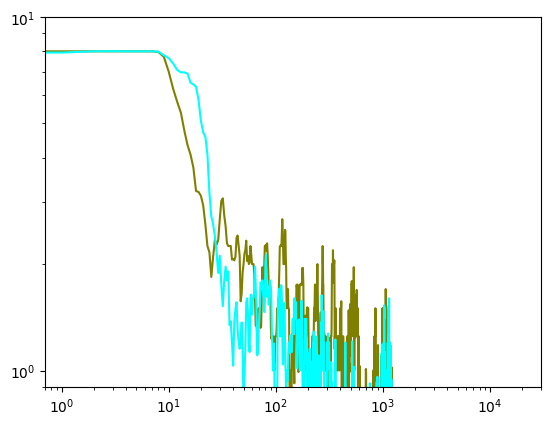

In [21]:
fronters_count_mean=fronter_mean.groupby(np.arange(len(fronters_count))//(25)).mean()
alingers_count_mean=alingers_mean.groupby(np.arange(len(alingers_count))//(25)).mean()
plt.loglog(fronters_count_mean,color='olive')
plt.loglog(alingers_count_mean,color='cyan')
plt.axis([0,3E4,0.9,10])

In [16]:
fronters_count_mean

,fronter_N008_D028_C0567.MP4_loc.csv,fronter_N008_D028_C0566.MP4_loc.csv,fronter_N008_D028_C0565.MP4_loc.csv,fronter_N008_D028_C0563.MP4_loc.csv
0,7.64,7.76,2.76,4.92
1,8.00,8.00,8.00,8.00
2,8.00,8.00,8.00,8.00
3,8.00,8.00,8.00,8.00
4,8.00,8.00,8.00,8.00
...,...,...,...,...
1262,0.00,0.00,0.00,0.00
1263,0.00,0.00,0.00,0.00
1264,0.00,0.00,0.00,0.00
1265,0.00,0.00,0.00,0.00


## mean according to mooving 

## fronters

In [63]:
fronters_count_mean_window

frame
575.0           NaN
576.0           NaN
577.0           NaN
578.0           NaN
579.0           NaN
             ...   
23456.0    3.260000
23457.0    3.263000
23458.0    3.266000
23459.0    3.268333
23460.0    3.270333
Name: distance_sq, Length: 22886, dtype: float64

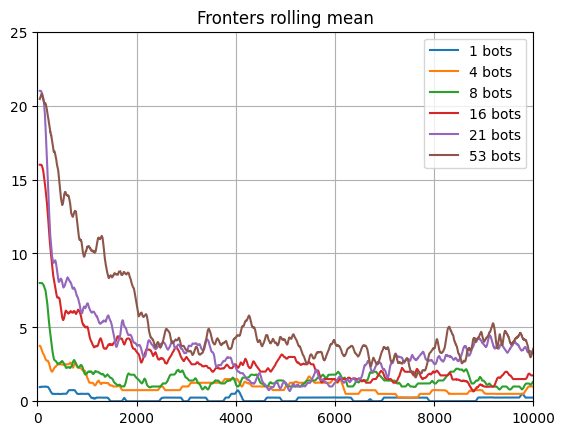

In [109]:
I=25*2
fig = plt.figure()
ax = plt.axes()
#ax.set_xscale("log")
for i in [1,4,8,16,21,53]:
    current_data=fronter_mean.loc[i]
    current_data_std=fronter_std.loc[i]
    fronters_count_mean_window=current_data['kissing_count'].rolling(I).mean()
    #print(fronters_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    plt.plot(fronters_count_mean_window,label='{:d} bots'.format(i))
    ax.legend()
    plt.title('Fronters rolling mean')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E4,0,25])
plt.grid()

In [110]:
def expShift(t,A,tau,k):
    return A*np.exp(-t/tau)+k

In [119]:
import scipy as sc

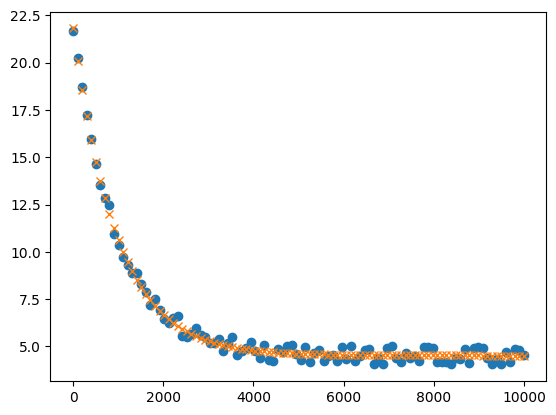

In [137]:
A, tau, k = 17, 1000, 4
t=np.linspace(0,10000,100)
kiss = expShift(t,A,tau,k)+np.random.rand(len(t))*1
plt.plot(t,kiss,'o')

fit,p = sc.optimize.curve_fit(expShift,t,kiss,p0=[10,2000,2])
plt.plot(t,expShift(t,*fit),'x')

In [130]:
fit

array([ 16.99599411, 999.00368052,   4.47898878])

## aligners

C:\Users\User\AppData\Local\Temp\ipykernel_21388\1886265542.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.axis([0,1E5,0,25])


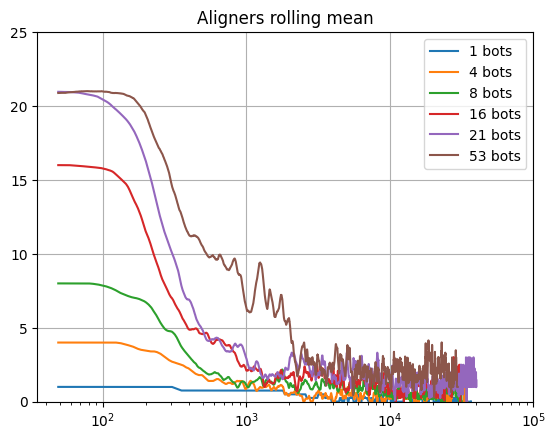

In [107]:
I=25*2
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
for i in [1,4,8,16,21,53]:
    current_data=aligners_mean.loc[i]
    current_data_std=aligners_std.loc[i]
    alingers_count_mean_window=current_data['kissing_count'].rolling(I).mean()
    #print(alingers_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    plt.plot(alingers_count_mean_window,label='{:d} bots'.format(i))
    ax.legend()
    plt.title('Aligners rolling mean')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E5,0,25])
plt.grid()

# I=25*60
fig = plt.figure()
ax = plt.axes()
ax.set_xscale("log")
fronters_count_mean_window=fronter_mean.rolling(I).mean()
fronters_count_std_window=fronter_std.rolling(I).mean()
alingers_count_mean_window=alingers_mean.rolling(I).mean()
alingers_count_std_window=alingers_std.rolling(I).mean()
ax.errorbar(list(range(0,len(alingers_count_mean_window))),alingers_count_mean_window,color='cyan',yerr=alingers_count_std_window,ecolor='pink',alpha=0.4)
ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1E5,0,10])